In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "/Users/daniyalrosli/textfilter/sms_data.csv"
df = pd.read_csv(file_path)

# Data Cleaning
# Keep only necessary columns and rename them
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})

# Convert labels to numeric values ('ham' -> 0, 'spam' -> 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Initialize vectorizers
count_vectorizer = CountVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the text data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Logistic Regression model using CountVectorizer
lr_count = LogisticRegression()
lr_count.fit(X_train_count, y_train)

# Predictions and evaluation for CountVectorizer
y_pred_count = lr_count.predict(X_test_count)
print("CountVectorizer Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

# Train Logistic Regression model using TfidfVectorizer
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)

# Predictions and evaluation for TfidfVectorizer
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
print("\nTfidfVectorizer Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf))


CountVectorizer Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[966   0]
 [ 26 123]]

TfidfVectorizer Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[966   0]
 [ 36 113]]


In [31]:
# Train and evaluate models using CountVectorizer features
models = {
    'Logistic Regression': lr_count,
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Compare models with CountVectorizer features
print("Results with CountVectorizer features:")
print("-" * 50)
for name, model in models.items():
    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Compare models with TF-IDF features
print("\nResults with TF-IDF features:")
print("-" * 50)
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Results with CountVectorizer features:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.9767
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[966   0]
 [ 26 123]]
--------------------------------------------------

Naive Bayes:
Accuracy: 0.9839
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[960   6]
 [ 12 137]]
-------


Best model with CountVectorizer: Naive Bayes (Accuracy: 0.9839)
Best model with TF-IDF: SVM (Accuracy: 0.9785)


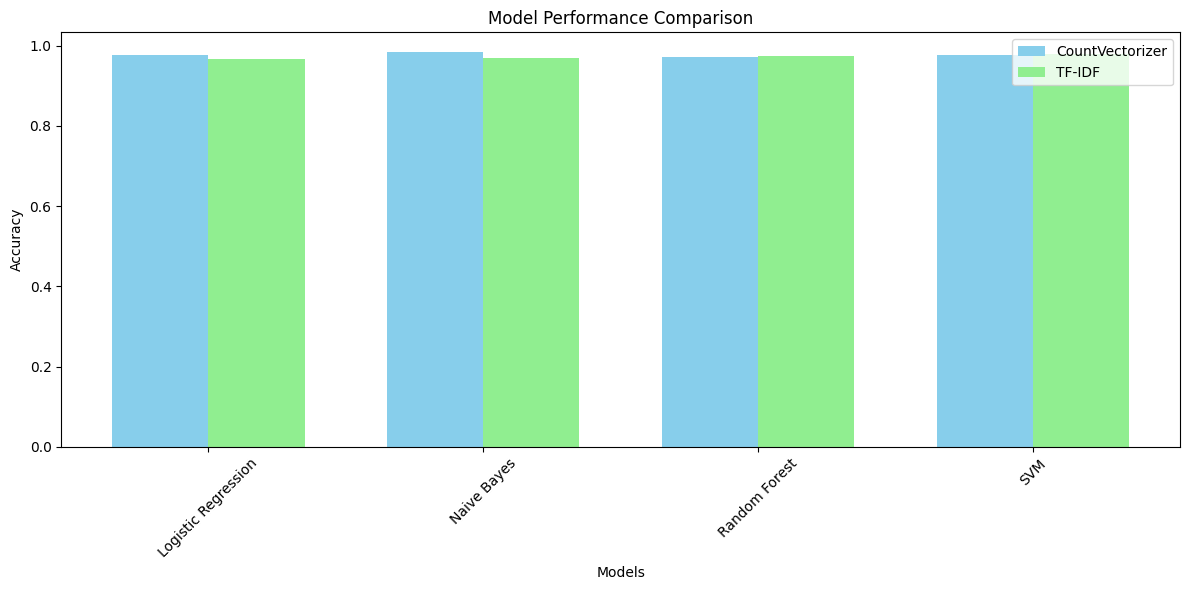

In [32]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Create lists to store accuracies
model_names = []
count_accuracies = []
tfidf_accuracies = []

# Calculate accuracies for each model
for name, model in models.items():
    # CountVectorizer accuracies
    model.fit(X_train_count, y_train)
    count_acc = accuracy_score(y_test, model.predict(X_test_count))
    
    # TF-IDF accuracies
    model.fit(X_train_tfidf, y_train)
    tfidf_acc = accuracy_score(y_test, model.predict(X_test_tfidf))
    
    model_names.append(name)
    count_accuracies.append(count_acc)
    tfidf_accuracies.append(tfidf_acc)

# Create bar plot
plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, count_accuracies, width, label='CountVectorizer', color='skyblue')
plt.bar(x + width/2, tfidf_accuracies, width, label='TF-IDF', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()

# Find and print the best model
best_count_idx = np.argmax(count_accuracies)
best_tfidf_idx = np.argmax(tfidf_accuracies)

print(f"\nBest model with CountVectorizer: {model_names[best_count_idx]} (Accuracy: {count_accuracies[best_count_idx]:.4f})")
print(f"Best model with TF-IDF: {model_names[best_tfidf_idx]} (Accuracy: {tfidf_accuracies[best_tfidf_idx]:.4f})")

In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'max_iter': [100, 200, 300]
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Perform grid search for each model with both vectorizers
best_models = {}
for name, model in models.items():
    # Grid search with CountVectorizer features
    grid_search_count = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    grid_search_count.fit(X_train_count, y_train)
    
    # Grid search with TF-IDF features
    grid_search_tfidf = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    grid_search_tfidf.fit(X_train_tfidf, y_train)
    
    print(f"\n{name}:")
    print("Best parameters with CountVectorizer:", grid_search_count.best_params_)
    print("Best score with CountVectorizer:", grid_search_count.best_score_)
    print("Best parameters with TF-IDF:", grid_search_tfidf.best_params_)
    print("Best score with TF-IDF:", grid_search_tfidf.best_score_)
    
    best_models[f"{name}_count"] = grid_search_count.best_estimator_
    best_models[f"{name}_tfidf"] = grid_search_tfidf.best_estimator_


Logistic Regression:
Best parameters with CountVectorizer: {'C': 10, 'max_iter': 100}
Best score with CountVectorizer: 0.9827238503621164
Best parameters with TF-IDF: {'C': 10, 'max_iter': 100}
Best score with TF-IDF: 0.9759938699400583

Naive Bayes:
Best parameters with CountVectorizer: {'alpha': 1.0}
Best score with CountVectorizer: 0.9802534563371633
Best parameters with TF-IDF: {'alpha': 0.5}
Best score with TF-IDF: 0.9836212146376571

Random Forest:
Best parameters with CountVectorizer: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best score with CountVectorizer: 0.9802542112706536
Best parameters with TF-IDF: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score with TF-IDF: 0.980702893408424

SVM:
Best parameters with CountVectorizer: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score with CountVectorizer: 0.9816017675509455
Best parameters with TF-IDF: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best score with TF-IDF: 0.9

In [34]:
import joblib

# Save the best model (SVM with TF-IDF)
best_model = best_models['SVM_tfidf']
joblib.dump(best_model, 'spam_classifier_model.joblib')

# Save the TF-IDF vectorizer for preprocessing new data
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Create a simple function to demonstrate how to use the saved model
def predict_spam(text):
    # Load the saved components
    loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')
    loaded_model = joblib.load('spam_classifier_model.joblib')
    
    # Transform the text using the saved vectorizer
    text_transformed = loaded_vectorizer.transform([text])
    
    # Make prediction
    prediction = loaded_model.predict(text_transformed)
    
    return "spam" if prediction[0] == 1 else "ham"

# Test the saved model
test_text = "WINNER!! As a valued network customer you have been selected to receive a £900 prize reward!"
print(f"Prediction for test message: {predict_spam(test_text)}")

Prediction for test message: spam


In [35]:
#test the saved model

test_text = "Hello, how are you doing today?"
print(f"Prediction for test message: {predict_spam(test_text)}")

Prediction for test message: ham
